1.주제선정 및 2.데이터수집

#### fish 길이에 따른 무게 예측
- 데이터셋 : fish.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 선형LinearRegression
- 피쳐 : 길이length
- 타겟: 무게weight



[1] 모듈 로딩 및 데이터 준비

In [95]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

3.데이터 전처리 및 4. 데이터 분석

[2] 데이터분석 -탐색적 분석

In [96]:
## 데이터준비

data_file = '../data/fish.csv'
fishhDF = pd.DataFrame(pd.read_csv(data_file, header=None, 
                                   skiprows=73, skipfooter=31,
                                   usecols=[1,2], engine='python'))
fishhDF.head()
## 1 = weight
## 2 = length

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


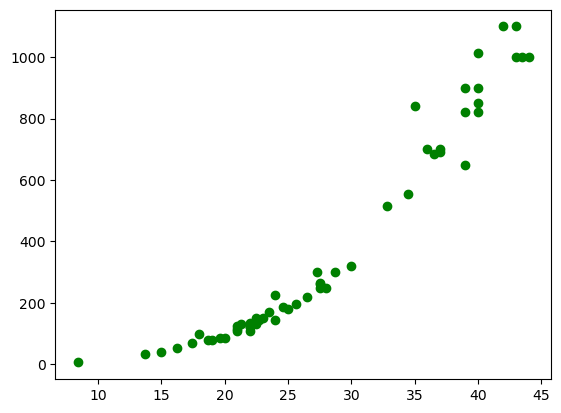

In [97]:
## 무게와 길이의 분포
plt.plot(fishhDF[2], fishhDF[1],'og')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: 길이에 따른 무게가 증가하는 양상 보임
    - 주의 


5. 피처와 타겟 선정
- 피처feature - length
- 타겟target - weight

6. 학습방법 결정: 회귀/분류, 알고리즘
- 선형회귀 linearRegression

7. 학습용 데이터셋 준비: 학습용(검증용), 테스트용

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [98]:
## 3-1 피처와 타겟 분리
featureDF = fishhDF[[2]]
targetSR = fishhDF[1]
print(f"featureDF => {featureDF.ndim}D, targetSR => {targetSR.ndim}D")

featureDF => 2D, targetSR => 1D


In [99]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (42, 1) / X_test => 2D, (14, 1)
y_train => 1D (42,) / y_test => 2D, (14,)


8. 학습진행 - 학습용 데이터 X_train, y_train

In [100]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [101]:
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [36.57487032]
lr.intercept_ -643.0421972940421
X_train = 36.57487031541895*y_train + -643.0421972940421


9. 평가 훈련용 테스트용 데이터셋 성능 평가, 비용 계산

In [102]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['pre_y'].append(pre_y)
    r_dict['score'].append(score)
    r_dict['score'].append(score)
    r_dict['score'].append(score)
    r_dict['score'].append(score)
    

KeyError: 'pre_y'

In [ ]:
result={}

In [ ]:
score = lr.score(X_train, y_train)
pre_y = lr.predict(X_train)
r2score = r2_score(y_train, pre_y)
rmse = root_mean_squared_error(y_train, pre_y)
mse = mean_squared_error(y_train, pre_y)
mae = mean_absolute_error(y_train,pre_y)
print(f"score => {score:.2f}, r2score =>{r2score:.2f}, mse => {mse:.2f}, mae => {mae:.2f}")
result['train'] = [score, r2score,rmse, mse, mae]

score => 0.91, r2score =>0.91, mse => 10321.80, mae => 74.55


In [ ]:
score = lr.score(X_test, y_test)
pre_y = lr.predict(X_test)
r2score = r2_score(y_test, pre_y)
rmse = root_mean_squared_error(y_test, pre_y)
mse = mean_squared_error(y_test, pre_y)
mae = mean_absolute_error(y_test,pre_y)
print(f"score => {score:.2f}, r2score =>{r2score:.2f}, mse => {mse:.2f}, mae => {mae:.2f}")
result['test'] = [score, r2score,rmse, mse, mae]

score => 0.94, r2score =>0.94, mse => 7623.45, mae => 71.77


In [ ]:
result

{'train': [0.9112370138200264,
  0.9112370138200264,
  101.59625355304917,
  10321.798736015457,
  74.55108675301166],
 'test': [0.9377981943997282,
  0.9377981943997282,
  87.31236958639187,
  7623.449882790687,
  71.77102346804236]}

In [ ]:
rDF = pd.DataFrame(result).T
rDF.columns=['score', 'r2score','rmse', 'mse', 'mae']
rDF

,score,r2score,rmse,mse,mae
train,0.911237,0.911237,101.596254,10321.798736,74.551087
test,0.937798,0.937798,87.312370,7623.449883,71.771023


In [ ]:
## 성능차이 행 추가
rDF.loc['diff'] = (rDF.loc['train']-rDF.loc['test']).abs()

In [ ]:
rDF.round(4)

,score,r2score,rmse,mse,mae
train,0.9112,0.9112,101.5963,10321.7987,74.5511
test,0.9378,0.9378,87.3124,7623.4499,71.7710
diff,0.0266,0.0266,14.2839,2698.3489,2.7801


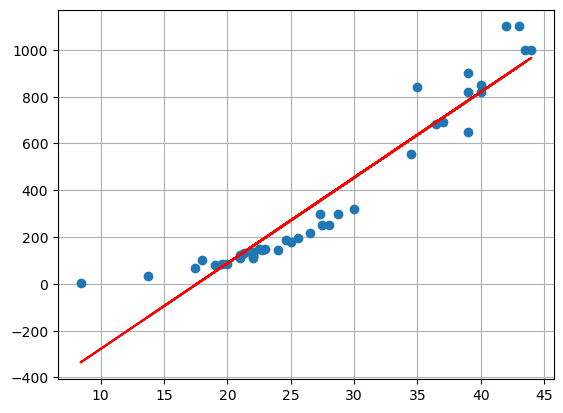

In [105]:
##회귀선 긋기
plt.plot(X_train, y_train, 'o')

#선형회귀에서 구한 y=lr.coef_x* lr.intercept_ 
# 
plt.plot(X_train, lr.predict(X_train), 'r-')
plt.grid()
plt.show()
azf = lr.predict(X_train)

10. 평가결과
- 훈련 데이터_train 보다 테스트용 데이터_test에서 
- 모델적합도 : score와 r2score는 더 높음 :최적
- 비용 계산값(손실값) : mse와 mae는 더 낮게 나타남
- 최적적합에 해당한다고 볼 수 있음.


만약 과대적합이라면.
- [해결방안]
* 과도한 반복학습 => scikit-leartn 에서는 개발자 제어 불가.
* 모델이 복잡한가? => 피쳐가 많은가? 피쳐는 1개임
* 데이터가 충분한가? => 데이터 충분하지 않음
* 해당 알고리즘의 결과물 분석 => 완전한 선형 아님. 곡선형.

11. 웹/앱 서비스 제공

#### [ 모델 성능평가에서의 문제점 개선을 위해서 추가 작업]
- 손실 / 비용함수 값이 큼 ==> 직선을 곡선의 형태 수식
- 기존 존재하는 피쳐를 활용해서 피쳐를 생성.

[6] 특성공학 => 피쳐 생성 후 추가<hr>
- 관련 모듈 로딩.
- 학습 진행 전 전처리 단계에서 피쳐 추가.

In [106]:
## [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [107]:
## [6-2] PolynomialFeature 클래스 사용법
## -임시데이터
X = [[2,3]]

## 객체/인스턴스 생성 : [기본 : 차수 2]
# poly = PolynomialFeatures(degree=5, include_bias=False, interaction_only=True)
## 피쳐끼리 곱셈값만 허용

poly = PolynomialFeatures(include_bias=False) #절편값 1 제외


## 객체/인스턴스에 피쳐 생성할 정보 제공
# poly.fit(X)
##  피쳐를 생성해서 추가
# poly.transform(X)
x2 = poly.fit_transform(X)
#두개를 같이

print(f"poly.n_features_in_ {poly.n_features_in_}")
print(f"poly.n_output_features_ {poly.n_output_features_}")




poly.n_features_in_ 2
poly.n_output_features_ 5


In [108]:
##[6-3] 데이터셋 즉, 학습용/테스트용 데이터셋 피쳐 추가
## - 학습용 : X_train
## - 테스트용 : X_test
## -> 학습용 데이터셋으로 피쳐 추가 정보 제공
poly = PolynomialFeatures()

## -> 학습용 피쳐 제공
poly.fit(X_train)

## -> 학습용/테스트용 피처 추가
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)



In [109]:
print(f"[학습용 피쳐] => {type(poly_train)}")
print(f"[테스트용 피쳐] => {type(poly_test)}")

[학습용 피쳐] => <class 'numpy.ndarray'>
[테스트용 피쳐] => <class 'numpy.ndarray'>


[7] 재학습 <hr>

In [110]:
## - 선형회귀
model = LinearRegression()
## - 학습
model.fit(poly_train,y_train)



LinearRegression()

In [111]:
## x가 3개로 늘었으므로 coef도 3개 반환.
## y = x1w1 + x2w2 + x3w3 + b
##    coef1  coef2  coef3
print(f"model.coef_ {model.coef_}")
print(f"model.intercept_ {model.intercept_}")
print(f"X_train = {model.coef_[0] }*y_train+ {model.coef_[1]}*y_train+ {model.coef_[2]}*y_train + {model.intercept_}")

model.coef_ [  0.         -22.2901199    1.01160071]
model.intercept_ 130.83870193134396
X_train = 0.0*y_train+ -22.290119903205888*y_train+ 1.0116007105741358*y_train + 130.83870193134396


[8-1] 시각화<hr>

In [112]:

## 곡선 회귀식에 대입할 데이터.
x = np.linspace(1,42,42)
print('shape:', x.shape)
print(x)

shape: (42,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]


In [113]:
##  곡선 회귀식 y = x^0 * w0 + x^1*w1 + x^2*x2 + b
y = (1*model.coef_[0]) + (x*model.coef_[1]) + ((x**2)*model.coef_[2]) + model.intercept_
## x , x1, x2 == 1, 3, 9

In [114]:
print(y)

[109.56018274  90.30486497  73.07274862  57.86383369  44.67812018
  33.51560809  24.37629743  17.26018818  12.16728036   9.09757396
   8.05106898   9.02776542  12.02766328  17.05076256  24.09706326
  33.16656539  44.25926893  57.3751739   72.51428029  89.6765881
 108.86209733 130.07080798 153.30272005 178.55783355 205.83614846
 235.1376648  266.46238255 299.81030173 335.18142233 372.57574435
 411.99326779 453.43399266 496.89791894 542.38504665 589.89537577
 639.42890632 690.98563829 744.56557168 800.16870649 857.79504272
 917.44458038 979.11731945]


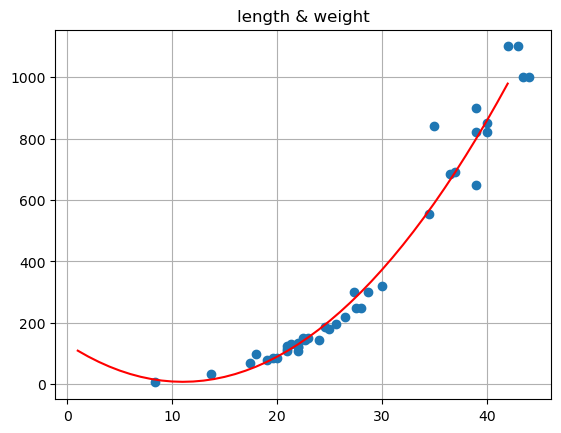

In [115]:
## 시각화 및 회귀선---

## 데이터 시각화
plt.plot(X_train, y_train, 'o')

plt.plot(x,y , 'r-')

plt.title('length & weight')
plt.grid()
plt.show()

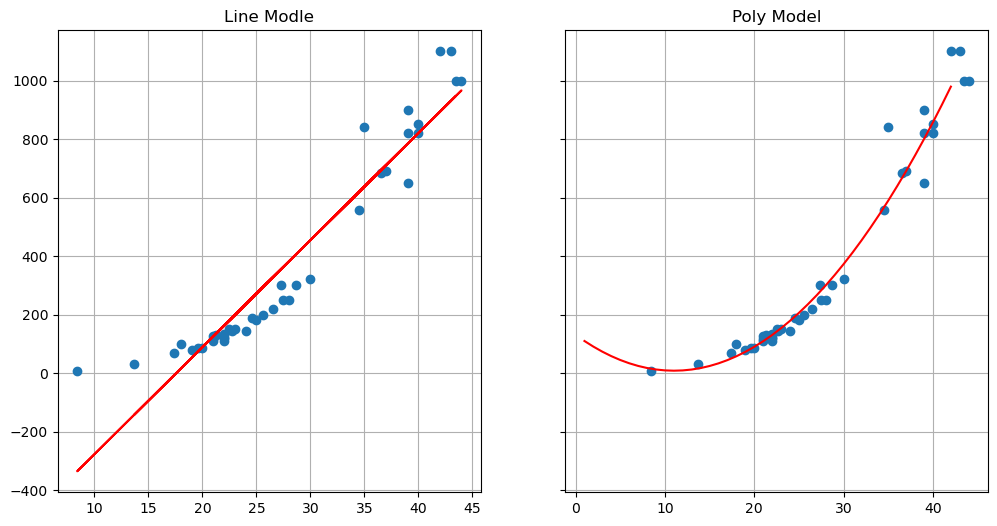

In [128]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
axes = axes.flatten()
for ax, title,  y1 in zip(axes, ["Line Modle", "Poly Model"], [(X_train,lr.predict(X_train)), (x,y)]):
    ax.plot(X_train, y_train, 'o', label='Fish')
    ax.plot(*y1 , 'r-')
    ax.set_title(title)
    ax.grid()    

plt.show()